<a href="https://colab.research.google.com/github/szywyk/data-analysis-python/blob/main/page-views-time-series-visualizer/page-views-time-series-visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv(
    'fcc-forum-pageviews.csv',
    parse_dates=[0],
    index_col=0
)

### Data info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [4]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [5]:
df.columns

Index(['value'], dtype='object')

In [6]:
df.shape

(1304, 1)

### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [7]:
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

In [9]:
df.shape

(1238, 1)

### Line Plot of daily freeCodeCamp Forum Page Views 5/2016-12/2019

In [10]:
def draw_line_plot():
  
    #first option
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df, color='red')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    
    #second option
    
    #fig = plt.figure(figsize=(12, 6))
    #plt.plot(df, color='red')
    #plt.xlabel('Date')
    #plt.ylabel('Page Views')
    #plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    #third option
    
    #fig = plt.figure(figsize=(12, 6))
    #ax = fig.add_subplot()
    #df.plot(ax=ax, xlabel='Date', ylabel='Page Views', title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019', legend=False, color='red')

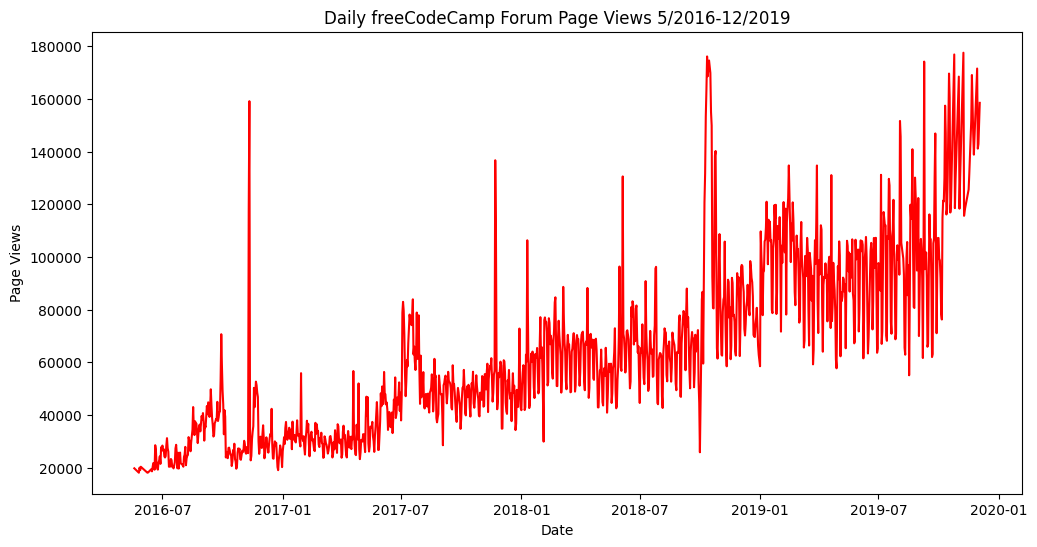

In [11]:
draw_line_plot()

### Bar plot of average daily page views for each month grouped by year. 

In [18]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()
    
    df_bar = df_bar.groupby(['year','month'], as_index=False)['value'].mean()
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    df_bar = df_bar.pivot(index='year', columns='month', values='value')
    df_bar = df_bar[months]
    
    # Draw bar plot
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot()
    df_bar.plot.bar(ax=ax, xlabel='Years', ylabel='Average Page Views').legend(title='Months')

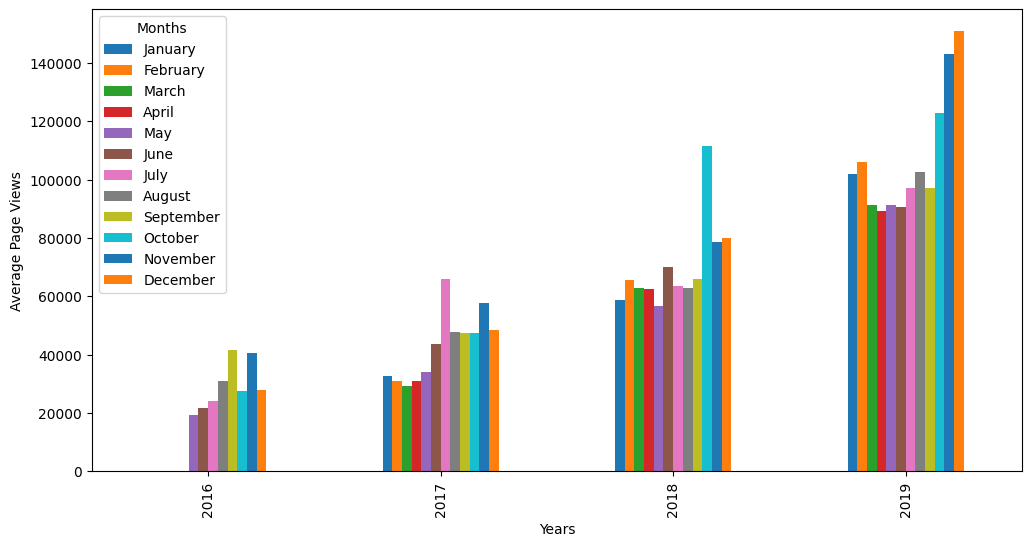

In [19]:
draw_bar_plot()

### Two box plots which show how the values are distributed within a given year or month and how it compares over time. ("Year-wise Box Plot (Trend)", "Month-wise Box Plot (Seasonality)")

In [20]:
def draw_box_plot():
    # Prepare data for box plots
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
    # Draw box plots (using Seaborn)
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    
    ax[0].set_title('Year-wise Box Plot (Trend)')
    sns.boxplot(data=df_box, x='year', y='value', ax=ax[0])
    ax[0].set(xlabel='Year', ylabel='Page Views')
    
    ax[1].set_title('Month-wise Box Plot (Seasonality)')
    sns.boxplot(data=df_box, x='month', y='value', ax=ax[1], order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax[1].set(xlabel='Month', ylabel='Page Views')

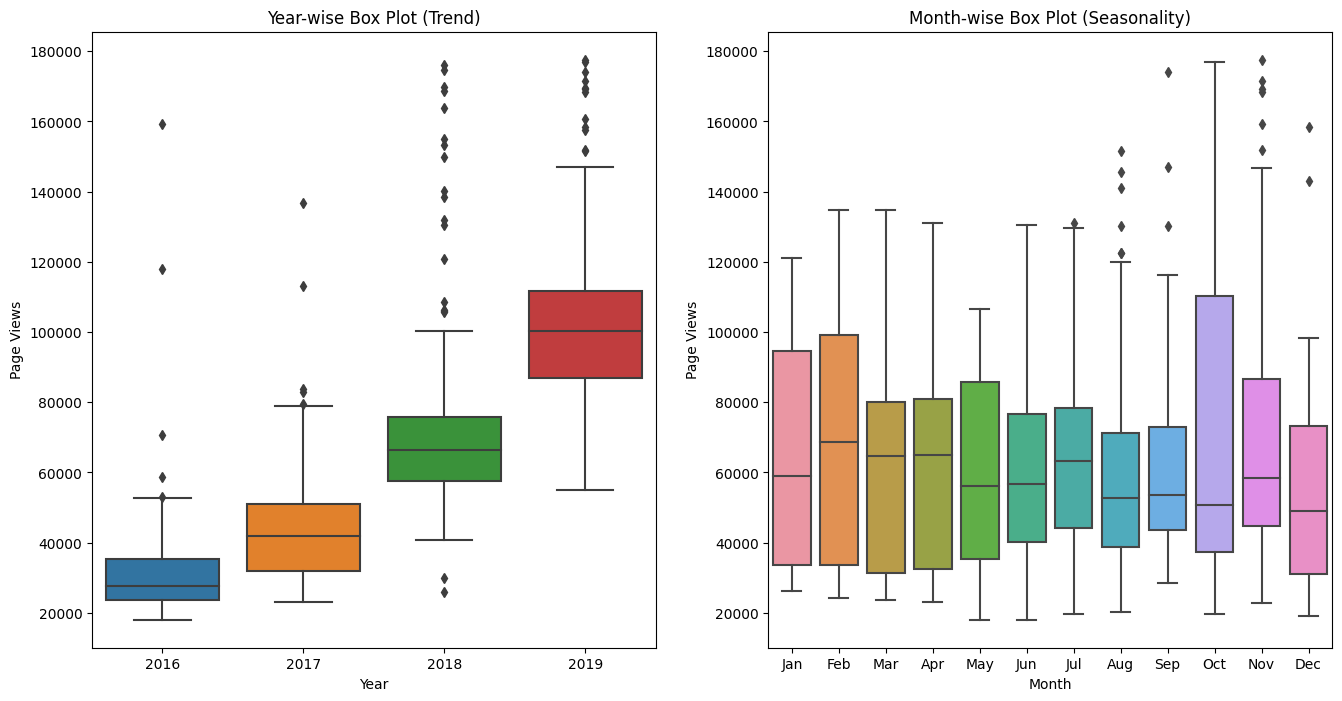

In [21]:
draw_box_plot()